 ## CH4 Spectra of passive and of active cams

*Script to illustrate the filter width of a passive gas camera*

In [1]:
%%capture
%load_ext autoreload
%autoreload 2
import os
from pathlib import Path
import matplotlib
import configparser
os.chdir('..')
from classes import Spectra, Observer, HiddenPrints

In [16]:
%%capture


VMR_Methan = 500E-6
VMR_Water = 10E-2
### Selektivität passiv

#%% 1. create a spectrum
selectivity_passiv = Spectra(name = 'CH4_selectivity_passiv')

#%% 2. add an observer
selectivity_passiv.observer = Observer(unit  = 'lam',      #'wav' : wavenumer [1/cm] | 'lam' : wavelength [nm].
                                lower = 1645  , #lower =  3260.,    
                                upper = 1655,  #upper =  3260.6,   
                                )
#%% 3. add gas_cells (may consist of multiple gasses) with gasses
# cell 1
selectivity_passiv.add_gas_cell(temperature    = 296,          # K. Default is 296
                         pressure       = 1,            # atm. Default is 1
                         length         = 100,           # cm. Default is 10
                         no_gasses      = 1)            # number of gasses. Default is 1

selectivity_passiv.gas_cells[-1].add_gas(gas_name  = "H2O",    # as in hitran
                                VMR        = VMR_Water)    # E-6 = ppm
# cell 2
selectivity_passiv.add_gas_cell(temperature    = 296,          # K. Default is 296
                         pressure       = 1,            # atm. Default is 1
                         length         = 100,           # cm. Default is 10
                         no_gasses      = 1)            # number of gasses. Default is 1

selectivity_passiv.gas_cells[-1].add_gas(gas_name  = "CH4",    # as in hitran
                                VMR        = VMR_Methan)    # E-6 = ppm 

#%% 4. download (running hapi functions)
selectivity_passiv.download(line_list = False,         # by setting to false, the linelist will nor be downloaded nor plotted.
                     step      = 0.01         # The step size determines the resolution of the graph. It is in the unit of wavenumbers (1/cm).
                    )  




To double check that everything is as desired, you can print a summary of your setup.

The plot function may be adjusted to ones needs.
If line list has not been downloaded (step 4), it will not be plotted.

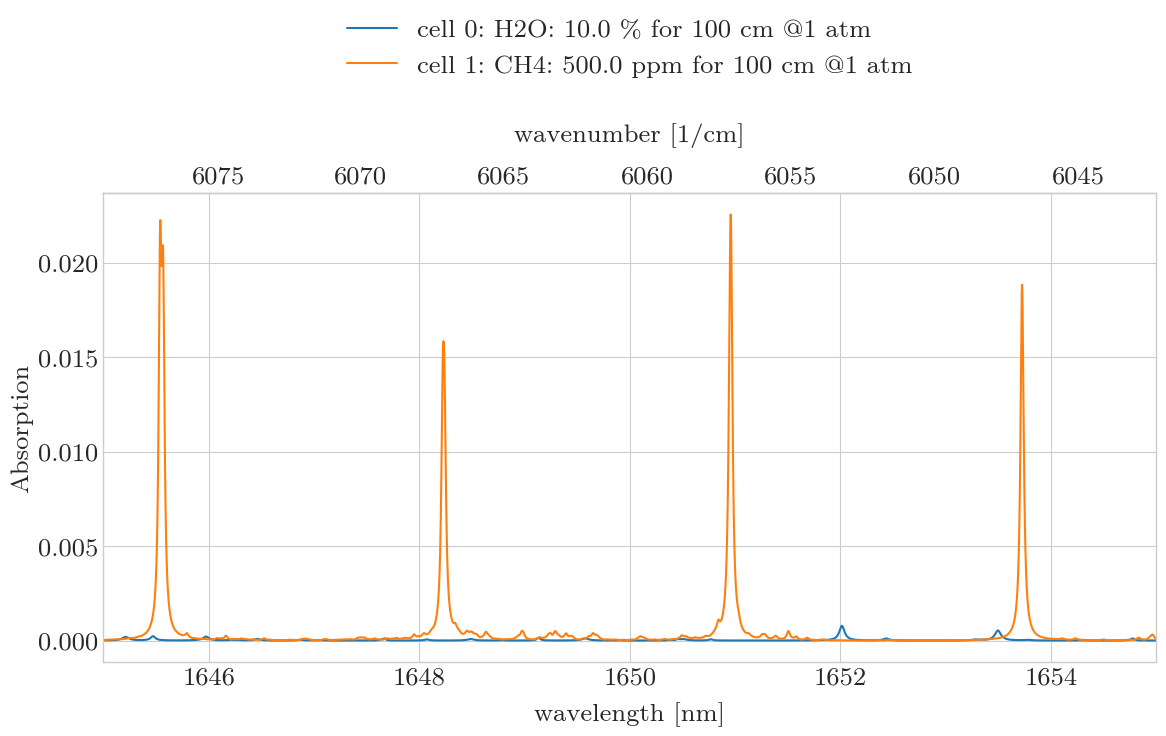

In [17]:
#%% 5. plot prop const
#matplotlib.rc_file(Path('C:/Users/i13500029/OneDrive - Endress+Hauser/Python/Figures_git/uni_layout_rc'))
#config = configparser.ConfigParser()
#config.read('C:/Users/i13500029/OneDrive - Endress+Hauser/Python/Figures_git/uni_layout_rc')
#matplotlib.rcParams.update(config['fullsize'])

a = selectivity_passiv.plot(figsize = (12, 8),
                 export = False,
                 fontsize = 18,
                 absorbance = False,
                 prop_const = False,
                )



